In [1]:
import sys
sys.path.insert(1, 'C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites')
from deconv import REGISTRY
import os
import timeit
import numpy as np

import json
import tifffile as tif
from imagequalitymetrics import ImageQualityMetrics
import normalize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nutil.plot import paperStyle

Num GPUs Available:  1


In [2]:
data_path = 'D:/jo77pihe/Registered/20220203_AutoQuant_NotAveraged'
result_path= 'D:/jo77pihe/Registered/20220214_Mu-Net'

iqm = ImageQualityMetrics()
normalizer = normalize.PercentileNormalizer()
minmax = normalize.MinMaxNormalizer()

In [54]:
folders= [f for f in os.listdir(result_path) if 'Trial' in f]

In [55]:
folders

['Trial_0_16_128_0.0001_16',
 'Trial_0_16_128_0.0001_4',
 'Trial_0_16_128_0.001_16',
 'Trial_0_16_128_0.001_4',
 'Trial_0_16_64_0.0001_16',
 'Trial_0_16_64_0.001_16',
 'Trial_1_16_128_0.0001_16',
 'Trial_1_16_128_0.001_16',
 'Trial_1_16_64_0.0001_16',
 'Trial_1_16_64_0.001_16',
 'Trial_2_16_64_0.0001_16',
 'Trial_2_16_64_0.001_16',
 'Trial_3_16_64_0.0001_16',
 'Trial_3_16_64_0.001_16']

In [56]:
res = np.zeros((15,8))
for (fx,fol) in enumerate(folders):
    imgs = [f for f in os.listdir(os.path.join(result_path,fol)) if f.endswith('.tif')]
    print('Number: ', len(imgs))
    parts= fol.split('_')
    res[fx,0:5]=[float(i) for i in parts[1:]]
    
    for (idx,img) in enumerate(imgs):
        imgf=tif.imread(os.path.join(result_path, fol, img))
        img_n=normalizer.normalize(imgf)
        gt=tif.imread(os.path.join(data_path, img))
        gt_n = normalizer.normalize(gt)
        res[fx,5]+=iqm.ssim(gt_n, img_n)
        res[fx,6]+=iqm.ssim(minmax.normalize(gt), minmax.normalize(imgf))
        res[fx,7] +=1

Number:  5
Number:  5
Number:  5
Number:  5
Number:  5
Number:  5
Number:  5
Number:  0
Number:  5
Number:  5
Number:  5
Number:  5
Number:  5
Number:  5


In [57]:
res[:,5] = res[:,5]/res[:,7]
res[:,6] = res[:,6]/res[:,7]

C:\Users\jo77pihe\AppData\Local\Temp/ipykernel_1104/3717555181.py:1: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\jo77pihe\AppData\Local\Temp/ipykernel_1104/3717555181.py:2: RuntimeWarning:

invalid value encountered in true_divide



In [58]:
np.save('munet_hyp_tun.npy', res)

In [ ]:
res=np.load('munet_hyp_tun.npy')

In [59]:
cols = ['levels','z', 'xy', 'lr', 'bz', 'SSIM_perc', 'SSIM_minmax', 'Counter']
df = pd.DataFrame(res, columns=cols)

In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

    levels     z     xy      lr    bz  SSIM_perc  SSIM_minmax  Counter
0      0.0  16.0  128.0  0.0001  16.0   0.420140     0.264896      5.0
1      0.0  16.0  128.0  0.0001   4.0   0.699996     0.437452      5.0
2      0.0  16.0  128.0  0.0010  16.0   0.723004     0.363936      5.0
3      0.0  16.0  128.0  0.0010   4.0   0.700803     0.326792      5.0
4      0.0  16.0   64.0  0.0001  16.0   0.187091     0.170824      5.0
5      0.0  16.0   64.0  0.0010  16.0   0.454386     0.245626      5.0
6      1.0  16.0  128.0  0.0001  16.0   0.427142     0.237758      5.0
7      1.0  16.0  128.0  0.0010  16.0        NaN          NaN      0.0
8      1.0  16.0   64.0  0.0001  16.0   0.513528     0.325256      5.0
9      1.0  16.0   64.0  0.0010  16.0   0.778868     0.788945      5.0
10     2.0  16.0   64.0  0.0001  16.0   0.636285     0.396347      5.0
11     2.0  16.0   64.0  0.0010  16.0   0.781104     0.646606      5.0
12     3.0  16.0   64.0  0.0001  16.0   0.648770     0.405060      5.0
13    

In [69]:
df.sort_values('SSIM_perc', 0, ascending=False)

C:\Users\jo77pihe\AppData\Local\Temp/ipykernel_1104/3625960110.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only



,levels,z,xy,lr,bz,SSIM_perc,SSIM_minmax,Counter
13,3.0,16.0,64.0,0.0010,16.0,0.782303,0.763993,5.0
11,2.0,16.0,64.0,0.0010,16.0,0.781104,0.646606,5.0
9,1.0,16.0,64.0,0.0010,16.0,0.778868,0.788945,5.0
2,0.0,16.0,128.0,0.0010,16.0,0.723004,0.363936,5.0
3,0.0,16.0,128.0,0.0010,4.0,0.700803,0.326792,5.0
1,0.0,16.0,128.0,0.0001,4.0,0.699996,0.437452,5.0
12,3.0,16.0,64.0,0.0001,16.0,0.648770,0.405060,5.0
10,2.0,16.0,64.0,0.0001,16.0,0.636285,0.396347,5.0
8,1.0,16.0,64.0,0.0001,16.0,0.513528,0.325256,5.0
5,0.0,16.0,64.0,0.0010,16.0,0.454386,0.245626,5.0


In [67]:
df = df.dropna()

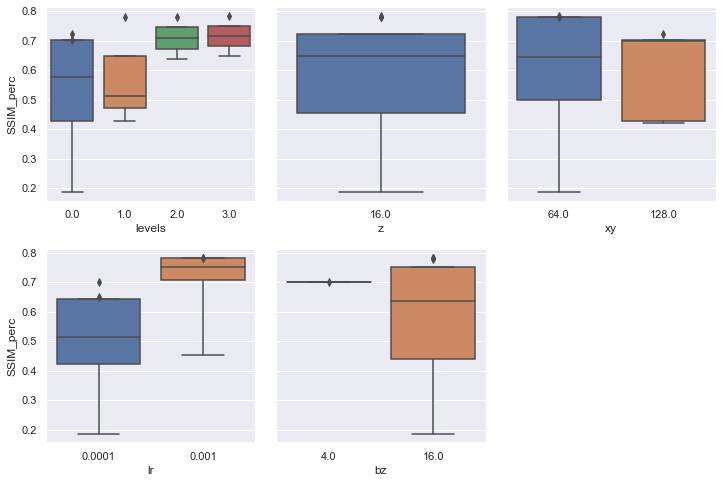

In [62]:
with paperStyle():
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(12)
    sns.set()

    for (i,c) in enumerate(cols[:-3]):
        ax = fig.add_subplot(2, 3, i+1)
        sns.boxplot(x=c, y="SSIM_perc", data=df, whis=[0,1], ax=ax)

        #sns.stripplot(data=df, x=c, y='SSIM')# hue= 'SSIM'
        #ax.set_ylim(0,1)
        if not(i ==0 or i==3):
             ax.set_yticklabels([])
             ax.set_ylabel('')

    plt.subplots_adjust(wspace=0.1, hspace=0.25)
plt.savefig('MuNet_Hyp.svg')
plt.savefig('MuNet_Hyp.pdf')

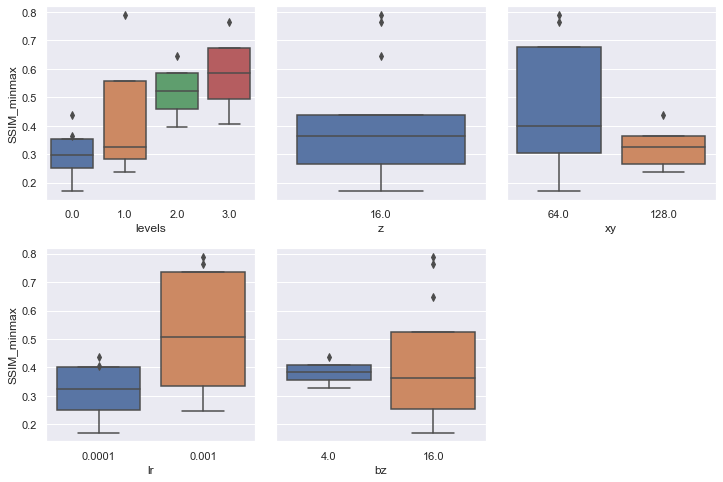

In [63]:
with paperStyle():
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(12)
    sns.set()

    for (i,c) in enumerate(cols[:-3]):
        ax = fig.add_subplot(2, 3, i+1)
        sns.boxplot(x=c, y="SSIM_minmax", data=df, whis=[0,1], ax=ax)

        #sns.stripplot(data=df, x=c, y='SSIM')# hue= 'SSIM'
        #ax.set_ylim(0,1)
        if not(i ==0 or i==3):
             ax.set_yticklabels([])
             ax.set_ylabel('')

    plt.subplots_adjust(wspace=0.1, hspace=0.25)
#plt.savefig('MuNet_Hyp.svg')
#plt.savefig('MuNet_Hyp.pdf')

In [64]:
df_r=df.rename(columns={"SSIM_perc": "SSIM"})

In [65]:
import plotly.express as px
fig = px.parallel_categories(df_r, color="SSIM",dimensions=['levels', 'xy', 'lr', 'bz'], labels={
                "levels": "Number levels", 
                "xy": "Patch size lateral", "lr": "Learning rate", "bz": "Batch size",})
fig.update_coloraxes(cmax=1)
fig.update_coloraxes(cmin=0)
fig.write_image("munet_hyp_tuning_res.pdf")
fig.write_image("munet_hyp_tuning_res.svg")
fig.write_image("munet_hyp_tuning_res.png", scale=2)

In [66]:
fig.show()